In [80]:
import numpy
import pandas
import tensorflow
import keras
from matplotlib import pyplot
import seaborn
import itertools

%matplotlib inline

In [81]:
# CLASSIFIER PARAMETERS
my_vars = ['petallength', 'petalwidth']
class_col = 'flower'
my_class = 'Iris-setosa'
my_loss = 'mse'
my_metrics = ['Precision']
lr = 0.001
my_epochs = 2000
my_val = 0.3

# SELECTION FROM IRIS DATAFRAME
my_vars_w_class = my_vars.copy()
my_vars_w_class.append(class_col)

In [82]:
iris = pandas.read_csv('iris.data')
iris = iris[my_vars_w_class]
iris

,petallength,petalwidth,flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


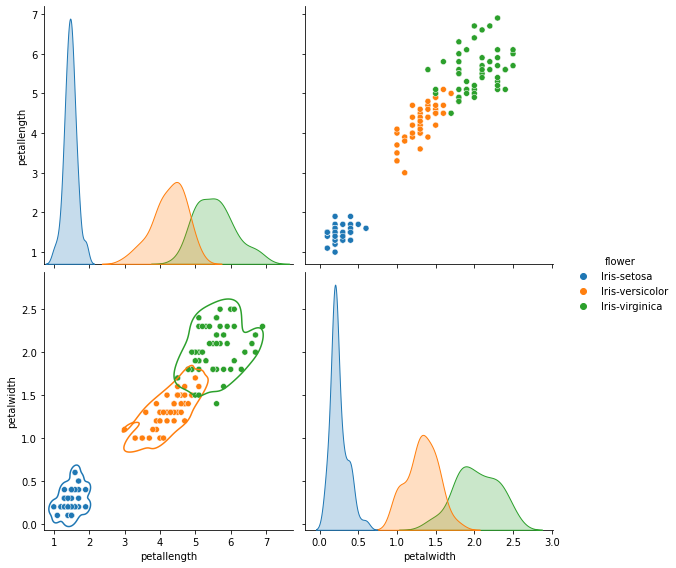

In [83]:
g = seaborn.pairplot(iris, hue='flower', height=4, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2")

In [84]:
# PREPARING Xn and Yn
X = iris[my_vars].to_numpy()
Y = (iris['flower'] == my_class).astype(int).to_numpy()[:, numpy.newaxis]

In [85]:
# BUILDING THE MODEL WITH THE SEQUENTIAL API
# my_net = keras.Sequential()
inputs = keras.Input(shape=(len(my_vars), ))
outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
model_name = '{}_classifier'.format(my_class)
my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
my_net.summary()

Model: "Iris-versicolor_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [86]:
# TRAINING THE MODEL
optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=lr)
# optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
my_net.compile(optimizer=optimizer, loss=my_loss, metrics=my_metrics)
# es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', patience=1000)
history = my_net.fit(X, Y, batch_size=X.shape[0], epochs=my_epochs, validation_split=my_val, verbose=1) # , callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 0.3670 - recall: 0.0000e+00 - val_loss: 1.6233e-04 - val_recall: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.3668 - recall: 0.0000e+00 - val_loss: 1.6710e-04 - val_recall: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.3667 - recall: 0.0000e+00 - val_loss: 1.7122e-04 - val_recall: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.3665 - recall: 0.0000e+00 - val_loss: 1.7499e-04 - val_recall: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 87ms/step - loss: 0.3664 - recall: 0.0000e+00 - val_loss: 1.7854e-04 - val_recall: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.3663 - recall: 0.0000e+00 - val_loss: 1.8193e-04 - val_recall: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.3662 - recall: 0.0000e+00 - val_l

In [87]:
# CLASS COLOR GRID & CLASS EVALUATION
grid_n_points = 100
class_threshold = 0.5
little_delta = 0.1

x0_grid = numpy.linspace(X[:, 0].min(), X[:, 0].max(), grid_n_points)
x1_grid = numpy.linspace(X[:, 1].min(), X[:, 1].max(), grid_n_points)
X_g = numpy.array(list(itertools.product(x0_grid, x1_grid)))
Y_g = my_net.predict(X_g)
Y_est = (my_net.predict(X) > class_threshold).astype(int)
t_error, t_precision = my_net.evaluate(X, Y, verbose=0)

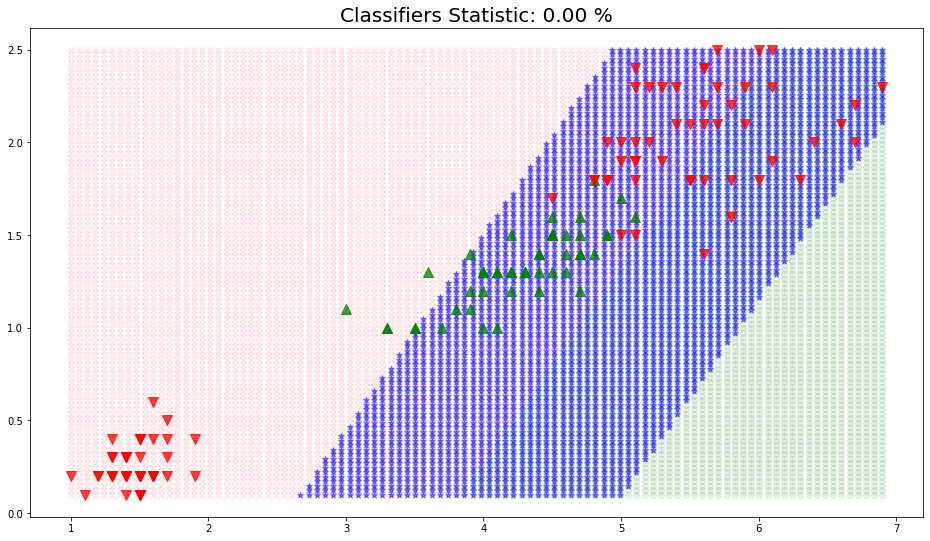

In [88]:
# CLASSIFICATION FIGURE
fig = pyplot.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# PLOT CLASS REGION
ix_class_region = Y_g.reshape(-1) > class_threshold
ix_class_points = Y.reshape(-1) == 1
ix_surface = (Y_g.reshape(-1) >= class_threshold - little_delta) &  (Y_g.reshape(-1) <= class_threshold + little_delta)
_ = ax.scatter(X_g[ix_class_region, 0], X_g[ix_class_region, 1], marker='o', color='green', alpha=0.1)
_ = ax.scatter(X_g[~ix_class_region, 0], X_g[~ix_class_region, 1], marker='x', color='red', alpha=0.1)
_ = ax.scatter(X_g[ix_surface, 0], X_g[ix_surface, 1], marker='*', color='blue', alpha=0.5)
_ = ax.scatter(X[ix_class_points, 0], X[ix_class_points, 1], marker='^', color='green', alpha=0.75, s=100)
_ = ax.scatter(X[~ix_class_points, 0], X[~ix_class_points, 1], marker='v', color='red', alpha=0.75, s=100)
_ = ax.set_title('Classifiers {}: {:.2f} %'.format('Statistic', 100*t_precision), size=20)

In [89]:
numpy.unique(Y_g)

array([0.14619094, 0.14718232, 0.14817926, ..., 0.7394994 , 0.7410222 ,
       0.74253935], dtype=float32)